# Question: Does Oct4 extend the delay time i.e. cell plasticity?

### Statistical tests
**Notebook description/ method ** <br>

Previously, I have calculated the delay time differences between the GNE, GNEO1, and GNEO2 networks and the GN reference network, $\Delta\tau_{i -GN}$, where $i \in \{GNE, GNEO1, GNEO2\}$.

In this notebook, I perform statistical analysis on the $\Delta\tau_{i -GN}$ data.
For each condition (parameter, rel change), I compare the delay time difference.

First, I check if the distrition of delay time differences is a normal distribution.
Besides a plotting the distribution (graphical method), I perform a Shapiro-Wilk test, to acces whether the delay time differences are normally distributioned or not. The null hypothesis is: "The distribution of delay time diffrences follow a normal distribution." The choice if significance level $\alpha=0.05$ (common practice.)

If the normality assumption is valid, I perform a one-sided t-test with the null hypothesis: "The delay time differences between network i+1 is the same or smaller than the delay time differnces between network i." For example, if i = GNE, i+1 = GNEO1.

If the distributions of the delay time diffrences do not follow a normal distribution, I perform a one-sided Mann-Whitney U-test. The null hypothesis is the same: "The delay time differences between network i+1 is the same or smaller than the delay time differnces between network i."

In both cases, I use signicance level $\alpha=0.05$ (\*, reasonable confidence),$\alpha=0.01$,(\*\*)$\alpha=0.001$ (\*\*\*, high-confidence results) to test the strength of evidence. [note to self: i will only indicate the aesterics if the null hypothesis is rejected.]
**Result** <br>

Example of result (update when the analysis is done. this is just to rememeber what i am interested in): None of the distributions follow a normal distribution.


In [2]:
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# 0. load data
diff_tau_all = pd.read_csv("time_delay_diff_241010_v4.csv")
diff_tau_all

,two_networks,network_ref,network_compare,parameter,rel change,condition 1,condition 2,time diff
0,GNEvGN,GN,GNE,alphaGN,0.2,False,False,1.026493
1,GNEvGN,GN,GNE,alphaGN,0.2,False,False,1.054603
2,GNEvGN,GN,GNE,alphaGN,0.2,False,False,1.078064
3,GNEvGN,GN,GNE,alphaGN,0.2,False,False,1.096036
4,GNEvGN,GN,GNE,alphaGN,0.2,False,False,0.808440
...,...,...,...,...,...,...,...,...
338095,GNEO2vGN,GN,GNEO2,KmaOE,5.0,True,True,1.084233
338096,GNEO2vGN,GN,GNEO2,KmaOE,5.0,True,True,1.141135
338097,GNEO2vGN,GN,GNEO2,KmaOE,5.0,True,True,1.212725
338098,GNEO2vGN,GN,GNEO2,KmaOE,5.0,True,True,1.339217


,two_networks,network_ref,network_compare,parameter,rel change,condition 1,condition 2,time diff
0,GNEvGN,GN,GNE,alphaGN,0.2,False,False,1.026493
1,GNEvGN,GN,GNE,alphaGN,0.2,False,False,1.054603
2,GNEvGN,GN,GNE,alphaGN,0.2,False,False,1.078064
3,GNEvGN,GN,GNE,alphaGN,0.2,False,False,1.096036
4,GNEvGN,GN,GNE,alphaGN,0.2,False,False,0.808440
...,...,...,...,...,...,...,...,...
338095,GNEO2vGN,GN,GNEO2,KmaOE,5.0,True,True,1.084233
338096,GNEO2vGN,GN,GNEO2,KmaOE,5.0,True,True,1.141135
338097,GNEO2vGN,GN,GNEO2,KmaOE,5.0,True,True,1.212725
338098,GNEO2vGN,GN,GNEO2,KmaOE,5.0,True,True,1.339217


In [17]:
# only compare diff delay times if both networks involved are bistable and robust in their stable fixed points.
mask0 = diff_tau_all["condition 1"]==True # bistable
mask1 = diff_tau_all["condition 2"]==True # sfp

diff_tau = diff_tau_all[mask0 & mask1]

In [88]:
parameter = "alphaGN"
network = "GNEO1vGN"
change = 1.0

mask_param = diff_tau["parameter"]==parameter
mask_networks = diff_tau["two_networks"]==network
mask_relchange = diff_tau["rel change"]==change
data = diff_tau[mask_param & mask_networks & mask_relchange]["time diff"]

In [89]:
import random
#data=np.random.normal(size=1127)
stat, p_value = shapiro(data)
p_value

9.528276859782636e-05

0.9982948899269104

((array([-3.23190097, -2.96929527, -2.82291729, ...,  2.82291729,
          2.96929527,  3.23190097]),
  array([-6.08319903, -5.083292  , -4.85389187, ...,  8.2007591 ,
          9.61863073, 10.17412595])),
 (2.3977303974507174, 1.6983893154505059, 0.996797110120824))

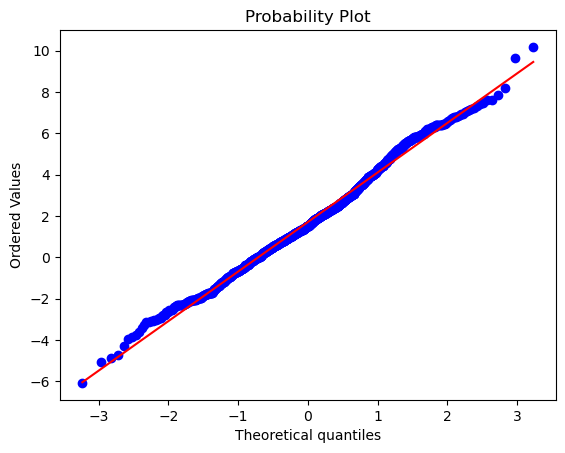

In [90]:
stats.probplot(data, dist="norm", plot=plt)

27.296382004171363


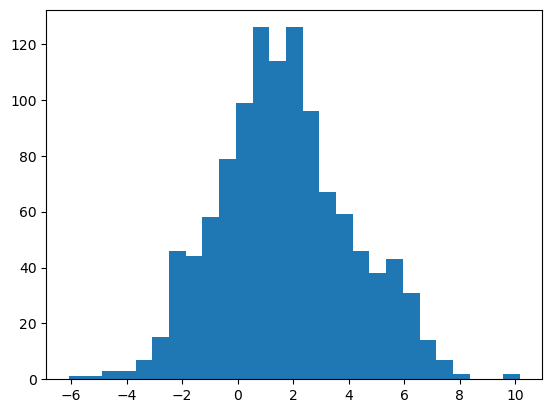

In [107]:
# number of bins (Freedman-Diaconis Rule)

maxx=np.max(data)
minx=np.min(data)
Q3=data.quantile(0.75)
Q1=data.quantile(0.25)
IQR=Q3-Q1
N=len(data)

Nbins=(maxx-minx)/(2*IQR/N**(1/3))
#Nbins=int(np.sqrt(len(data)))
print(Nbins)

freq, bins, patches = plt.hist(data, bins=int(Nbins)) 

### perform a formal normality test (Shapiro-Wilk test)
H0: The sample is normally distributed

choice of significance level: $\sigma$=0.05 (widely accepted in practice)

Note on interpretation of the p-value:
If p-value > 0.05, the SW-test does not reject the null hypothesis, and the data is consistent with being normally distributed.

If p-value < 0.05, the SW-test does reject the null hypothesis, suggesting the data is not normally distributed.

In [2]:
data = [3.5, 7.2, 1.9, 5.4, 9.1]  # Unordered sample
stat, p_value = shapiro(data)

In [3]:
p_value

0.9520812034606934

### If normally distributed, perform a t-test one-sided

H0: The mean difference in delay time between (GNEO1 and GN) GNE and GN is (the same) zero or smaller (compared to the mean difference in delay time between GNE and GN.)

H1: The mean differnce in delay time between GNE and GN is larger than zero.


In [ ]:
## Assuming you have two arrays of delay times: delay_times_network and delay_times_reference
#t_stat, p_value = stats.ttest_ind(delay_times_network, delay_times_reference, alternative='greater')  # for one-sided

## If using a basic two-sided test:
## t_stat, p_value = stats.ttest_ind(delay_times_network, delay_times_reference)
## p_value /= 2  # adjust for one-sided

#print(f"T-statistic: {t_stat}, One-sided p-value: {p_value}")